In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os, subprocess
import glob
import math
import sys  
sys.path.insert(0, './src/')
from clusterdata import ClusterInfo
np.set_printoptions(suppress=True,precision=4)

In [2]:
!ls results

 ch_mp-Jan-12.json		 result.json-cons-Feb-25-inc
 latest_result-constraint.json	 result.json-cons-Feb-27-inc
 latest_result.json		 result.json-nocons-Feb-23-inc
 log.out-cons-Feb-23-inc	 result.json-nocons-Feb-25-inc
 log.out-nocons-Feb-23-inc	 result.json-nocons-Feb-27-inc
 MoVW-cons-Feb14.json		'result_kB=1'
 MoVW-cons-Feb-15.json		'result_kB=SI'
 MoVW-nocons-Feb-15.json	 result_muscan_trial
 noch-Jan-12.json		 sro_normC.json
 old_results			 sro_unconstrained-Jan-12.json
 result.json-cons-Feb-23-inc


In [3]:
# clus = ClusterInfo( 
#     clusters_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/clusters.out",
#     eci_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/eci.out",
#     kb_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/configkb.out",
#     clustermult_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333//clusmult.out",
#     configmult_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/configmult.out",
#     config_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/config.out",
#     vmat_fname="BCC_A2/sqs_lev=3_a_Mo=0.33333,a_V=0.33333,a_W=0.33333/vmat.out", 
# )

Reading ECIs from existing file eci.out.


In [3]:
clus = ClusterInfo( 
    clusters_fname="BCC_A2/sqs_lev=1_a_Mo=0.5,a_W=0.5/clusters.out",
    eci_fname="BCC_A2/sqs_lev=1_a_Mo=0.5,a_W=0.5/eci.out",
    kb_fname="BCC_A2/sqs_lev=1_a_Mo=0.5,a_W=0.5/configkb.out",
    clustermult_fname="BCC_A2/sqs_lev=1_a_Mo=0.5,a_W=0.5/clusmult.out",
    configmult_fname="BCC_A2/sqs_lev=1_a_Mo=0.5,a_W=0.5/configmult.out",
    config_fname="BCC_A2/sqs_lev=1_a_Mo=0.5,a_W=0.5/config.out",
    vmat_fname="BCC_A2/sqs_lev=1_a_Mo=0.5,a_W=0.5/vmat.out", 
)

Reading ECIs from existing file eci.out.


In [16]:
results = {}
results['inc_nocons1'] = pd.read_json('BCC_A2/sqs_lev=1_a_Mo=0.5,a_W=0.5/result.json-nocons-Feb-27-inc').drop('corrs',axis=1)
results['inc_cons1'] = pd.read_json('results/result.json-cons-Feb-27-inc').drop('corrs',axis=1)

In [17]:
results['inc_cons1'].temperature

0    100
1    200
2    300
3    400
4    500
5    600
Name: temperature, dtype: int64

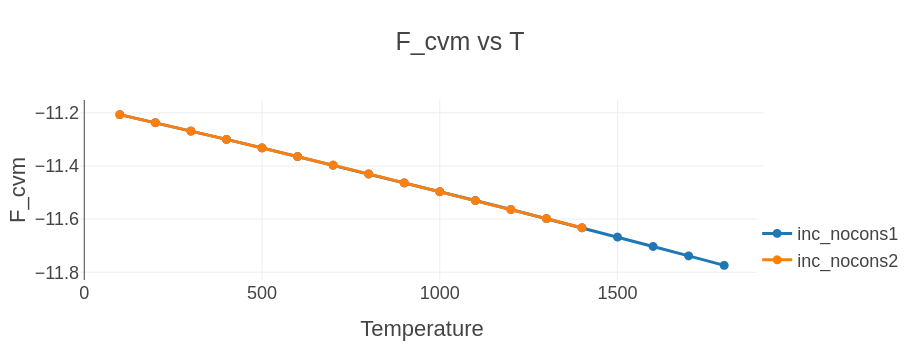

In [13]:
fig = go.Figure()

for name, df in results.items():
    fig.add_trace(go.Scatter(x=df['temperature'],
                             y=df['F_cvm'],
                             mode='markers+lines',
                             name=f'{name}'
                            )
                 )

fig.update_layout(
    title="F_cvm vs T",
    xaxis_title="Temperature",
    yaxis_title="F_cvm",
    template='presentation'
)
#fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.01,
    xanchor="left",
    x=0.99
))
fig.show()

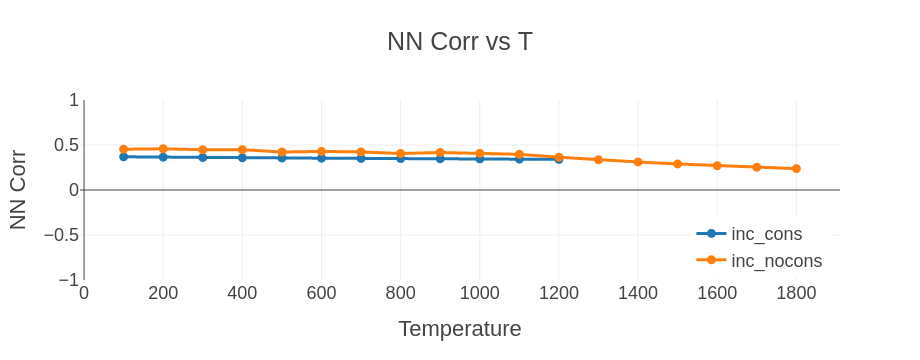

In [7]:
fig = go.Figure()

for name, df in results.items():
    fig.add_trace(go.Scatter(x=df['temperature'],
                             y=df['corr 5'],
                             mode='markers+lines',
                             name=f'{name}'
                            )
                 )

fig.update_layout(
    title="NN Corr vs T",
    xaxis_title="Temperature",
    yaxis_title="NN Corr",
    template='presentation'
)
#fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.01,
    xanchor="right",
    x=0.99
))
fig.update_yaxes(range=[-1, 1])
fig.show()